<a href="https://colab.research.google.com/github/ZinaTlish/DZ-DA/blob/main/%D0%94%D0%976%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.6 MB/s eta 0:00:00


In [3]:
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
from catboost import CatBoost

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
file_paths = ['/content/gdrive/MyDrive/Covid/100.csv', '/content/gdrive/MyDrive/Covid/101.csv', '/content/gdrive/MyDrive/Covid/102.csv', '/content/gdrive/MyDrive/Covid/103.csv','/content/gdrive/MyDrive/Covid/104.csv']
all_data = [pd.read_csv(file_path) for file_path in file_paths]

In [6]:
data_settings = all_data[1]
columns = data_settings.columns
signal_data = data_settings[columns[1]]
signal_data = signal_data[:50000]

In [7]:
peaks = find_peaks(signal_data, height=1100)

(0.0, 17500.0)

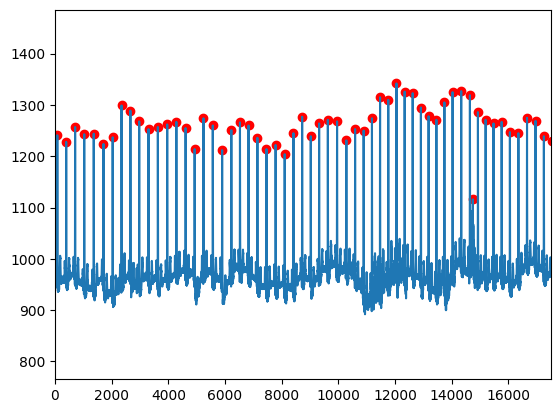

In [8]:
plt.plot(signal_data)
plt.scatter(peaks[0], signal_data[peaks[0]], color='red')
plt.xlim([0, 17500])


In [9]:
window_size = 300
stride = 8
y_lim = 0.1
x_lim = 10

In [10]:
def extract_features(signal, peaks):
    feature_set = []
    middle_points = []
    peak_count = 0

    for i in range(0, len(signal)-window_size, stride):
        norm_coef = np.max(np.abs(signal[i:i+window_size]))
        window_piece = signal[i:i+window_size] / norm_coef
        window_piece = window_piece - np.mean(window_piece)

        is_peak = 0
        middle_point = int((i + i + window_size) / 2)

        for peak in peaks[0]:
            if middle_point - x_lim <= peak < middle_point + x_lim and \
               (signal[peak] - signal[middle_point]) / norm_coef < y_lim:
                is_peak = 1
                peak_count += 1
                middle_points.append(middle_point)
                break

        window_piece = np.append(window_piece, is_peak)
        feature_set.append(window_piece)

    return feature_set, peak_count, middle_points


In [11]:
dataset, peak_count, middle_points = extract_features(signal=signal_data, peaks=peaks)

In [12]:
df_features = pd.DataFrame(dataset)

In [13]:
norm_signal = signal_data - np.mean(signal_data)
norm_signal = norm_signal / np.max(norm_signal)

(0.0, 2000.0)

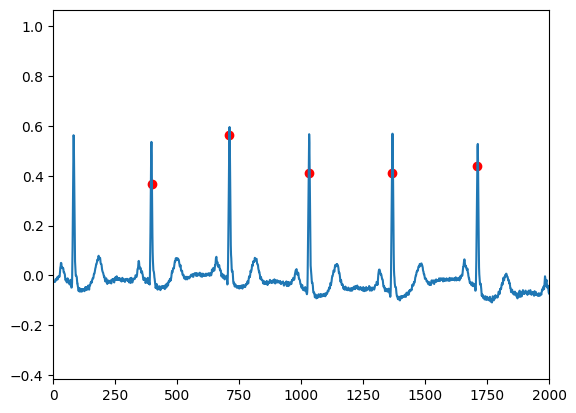

In [14]:
plt.plot(norm_signal)
plt.scatter(middle_points, norm_signal[middle_points], color='red')
plt.xlim([0, 2000])

In [15]:
result_signal = []

In [16]:
for df in all_data:
    result_signal.extend(df[df.columns[1]])

print(len(result_signal))

3250000


In [17]:
peaks_all = find_peaks(result_signal, height=1100)
dataset, peak_count, middle_points = extract_features(signal=result_signal, peaks=peaks_all)

In [18]:
df_result = pd.DataFrame(dataset)
df_to_plot = pd.DataFrame(result_signal)

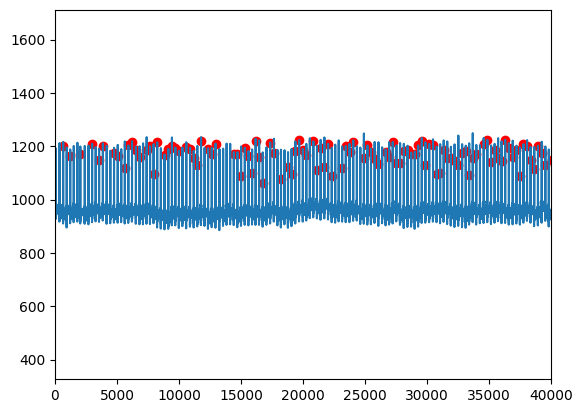

In [19]:
 plt.plot(result_signal)
plt.scatter(middle_points[:peak_count], df_to_plot[0][middle_points[:peak_count]], color='red')
plt.xlim([0, 40000])

plt.show()


In [20]:
file_path_121 = '/content/gdrive/MyDrive/Covid/121.csv'
df_121 = pd.read_csv(file_path_121)

In [21]:
signal_121 = df_121[df_121.columns[1]][:50000]
peaks_121 = find_peaks(signal_121, height=1100)
dataset_121, peak_count_121, middle_points_121 = extract_features(signal=signal_121, peaks=peaks_121)

In [22]:
df_features_121 = pd.DataFrame(dataset_121)


In [23]:
norm_signal_121 = signal_121 - np.mean(signal_121)
norm_signal_121 = norm_signal_121 / np.max(norm_signal_121)

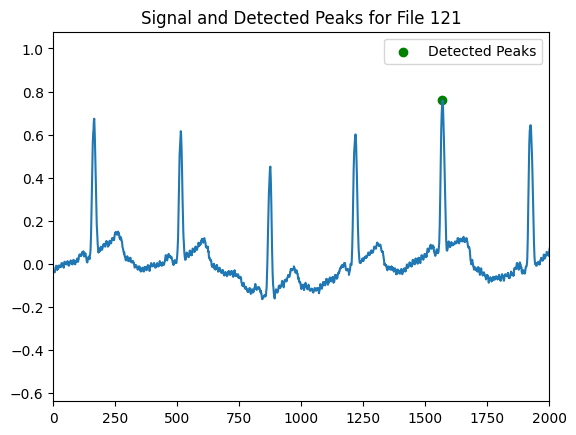

In [24]:
plt.plot(norm_signal_121)
plt.scatter(peaks_121[0], norm_signal_121[peaks_121[0]], color='green', label='Detected Peaks')
plt.xlim([0, 2000])
plt.legend()
plt.title('Signal and Detected Peaks for File 121')
plt.show()